
# Project: Investigate a Dataset (Gapminder World)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#wrangling2">Data Wrangling Act 2</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Healthcare has become an increasingly important area for politics and economics, especially in U.S. While it has been increasely being considered a human right - everyone deserved to get quality healthcare, how to design the system has been under great debate. U.S. has more free market approach while there are countries lean more toward as a single payer system with heavy government subsidy. This study attempt to look at the cost of different approach and effectiveness of the care using different approach.

### Data structure

The data provided by Gapminder are in .xlsx format. Excel was used to open them and save into .csv files. Although each csv file represents two-dimensional array, to group muliple indicators/files together will lead to a three-dimensional array. Pandas's 3-dimensional structure - panel, will be [deprecated](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro-deprecate-panel). Hence it will be better to use multiple-index DataFrame as suggested by official Pandas documents.

This study will import data as oridinary DataFrame. Along the way we will consider changing them to different format for easier handling and representation.

We choose the following four data files related to healthcare for study.

1. "indicator health spending per person (US $).csv"
2. "indicator_government share of total health spending.csv"
3. "indicator total health expenditure perc of GDP.csv"
4. "indicator life_expectancy_at_birth.csv"

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



# The key of dict is a shorthand for the filename.
# The key is also used to reference the indicator.
indicator_to_filenames={
    "spending per person(US $)" : "data/indicator health spending per person (US $).csv",
    "government share (%)" : "data/indicator_government share of total health spending.csv",
    "expenditure perc of GDP (%)" : "data/indicator total health expenditure perc of GDP.csv",
    "life expectancy" : "data/indicator life_expectancy_at_birth.csv"
}
indicators = indicator_to_filenames.keys()

# dfs is the main store of the oridinary DataFrames.
dfs={}

# Firts, read all CSVs in ordinary DataFrame format.
for _i in indicators:
    dfs[_i] = pd.read_csv(indicator_to_filenames[_i])



In [2]:
#Examine the initial data
for _i in indicators:
    print('\n\n',_i)    
    print(dfs[_i].head(3))
    print(dfs[_i].info())



 spending per person(US $)
  Per capita total expenditure on health at average exchange rate (US$)  1995  \
0                                           Abkhazia                      NaN   
1                                        Afghanistan                      NaN   
2                              Akrotiri and Dhekelia                      NaN   

   1996  1997  1998  1999  2000  2001       2002       2003       2004  \
0   NaN   NaN   NaN   NaN   NaN   NaN        NaN        NaN        NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN  14.818293  18.312764  20.665594   
2   NaN   NaN   NaN   NaN   NaN   NaN        NaN        NaN        NaN   

        2005       2006       2007       2008       2009       2010  
0        NaN        NaN        NaN        NaN        NaN        NaN  
1  21.859666  23.820132  28.808767  31.809727  33.710308  37.666786  
2        NaN        NaN        NaN        NaN        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 2

<a id='wrangling'></a>
## Data Wrangling

The data are in general were parsed well. All data were parsed into float64 format. However, following improvments can be done to improve the representation of data:
1. The name of 1st column is not the name of the column but the name of the values in that csv file. We already know the name of indicator by the filename and saved it in a dict as key, there is no need to retain them in DataFrame. So we will change the name of the 1st column to more proper 'Nation'.
2. The first three files have 262 nations in the data, while the fourth file has 999 nations in the data. The study will select three nations with different healthcare system, Canada, Germany, and United States for comparison. So we will slice the data to limit to only these three nations. 

In [3]:

for _i in indicators:
    print('\n\n',_i)
    
    # The 1st column, e.g., nation, is labled as the name of the value in the csv.
    # The name of value is embeded in each DataFrame and is the same as the whole DataFrame, the column
    # really should be named Nation.
    dfs[_i].rename(columns={dfs[_i].columns[0]:'Nation'}, inplace=True)
    
    # Now set Nation as index
    dfs[_i].set_index('Nation', inplace=True)
    print(dfs[_i].head())
    print(dfs[_i].shape)

    



 spending per person(US $)
                            1995       1996       1997       1998       1999  \
Nation                                                                         
Abkhazia                     NaN        NaN        NaN        NaN        NaN   
Afghanistan                  NaN        NaN        NaN        NaN        NaN   
Akrotiri and Dhekelia        NaN        NaN        NaN        NaN        NaN   
Albania                27.910805  43.045818  36.135184  47.102142  65.024024   
Algeria                62.055538  61.769883  66.893742  65.983195  62.521470   

                            2000       2001       2002        2003  \
Nation                                                               
Abkhazia                     NaN        NaN        NaN         NaN   
Afghanistan                  NaN        NaN  14.818293   18.312764   
Akrotiri and Dhekelia        NaN        NaN        NaN         NaN   
Albania                75.236623  79.862222  90.264318  113.

>Now the 1st column of the DataFrame has been renamed to 'Nation', they are more readable. Now let's further trim down the data to leave only the three countries we plan to explore.

In [4]:
# nation list store the three nations to be studies. This list will be used multiple times later.
nations = ['Canada', 'Germany', 'United States']

for _i in indicators:
    dfs[_i]=dfs[_i].loc[nations]
    print('\n\n',_i)
    print(dfs[_i])




 spending per person(US $)
                      1995         1996         1997         1998  \
Nation                                                              
Canada         1820.609018  1828.837371  1873.002802  1848.571848   
Germany        3126.314386  3102.388473  2699.915994  2734.414704   
United States  3747.692121  3899.976933  4054.627219  4235.837199   

                      1999         2000         2001         2002  \
Nation                                                              
Canada         1936.587877  2089.213973  2148.976137  2249.068799   
Germany        2691.206886  2387.159591  2400.534081  2610.346182   
United States  4450.044994  4703.467344  5051.944952  5452.996081   

                      2003         2004         2005         2006  \
Nation                                                              
Canada         2676.794950  3036.640797  3454.416864  3912.321554   
Germany        3208.976450  3527.979257  3626.474872  3747.899190   
Uni

>Read all data into oridinary DataFrames with simple cleaning has been completed.

>Before deciding how we want to explore them, let's do the initial visualization to see what kind of data we have, so that we can come up with idea what will be appropriate ways to explore them.

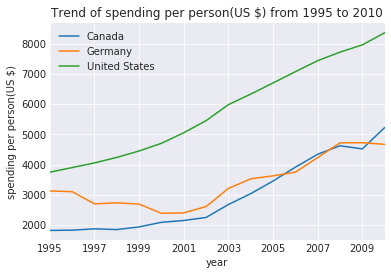

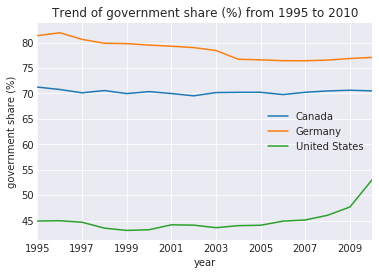

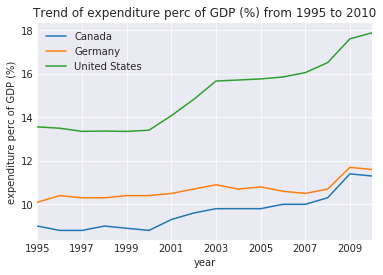

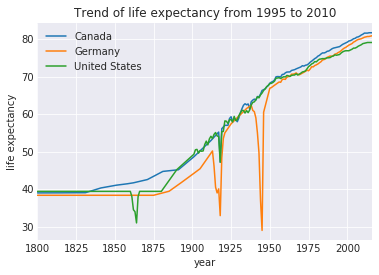

In [5]:
# For each indicator, just virualize the data by year and put all three nations on the same chart.
# sns.set_style() was used to experiment with different styles.
# After trying some styles, darkgird looks better for these data set
def print_all_dfs_as_linechart(dfs):
    sns.set_style(style="darkgrid")
    for _i in indicators:
        for _n in nations:
            dfs[_i].loc[_n].plot(kind="line")
        plt.xlabel('year')
        plt.ylabel(_i)
        plt.title("Trend of {} from {} to {}".format(str(_i), dfs['government share (%)'].columns[0], dfs['government share (%)'].columns[-1]))
        plt.legend()
        plt.show()
    
print_all_dfs_as_linechart(dfs)


The range of the first three data sets begin from year 1995 while the fourth from as early as 1800. Trim the fourth data to match others make sense to explore the relationships between datasets.

> _**A observation but not something we plan to explore:**_ The chart of _Life Expectancy_ indicates two sharp drops during certain years, especially noticeable for some nations. This is likely related to the tragic World Wars that happened during those years.


### Data Cleaning
The data per year are currently represented as columns. We will confirm the first three DataFrames have the same set of columns, then trim the fourth DataFrame to have the same columns as the former ones.

In [6]:
import itertools
import numpy as np

# pairwise provide dual index with one step lag between them. So we can compare
# -------
# pairwise function copied directly from the python documentation on itertools
# -------
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

def check_all_columns_match(indicators):
    for _i, _j in pairwise(indicators):
        print(_i, _j)
        print(dfs[_i].columns)
        
        # We use numpy all function to compare every element one by one of two arrays
        print(np.all(dfs[_i].columns == dfs[_j].columns))


>Now slice the 4th DataFrame's columns to match others.

In [7]:
# Slice the fourth data
dfs['life expectancy']=dfs['life expectancy'].loc[:,'1995':'2010']

# check it out
print(dfs['life expectancy'].head())

# rerun the column check
check_all_columns_match(indicators)

               1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  \
Nation                                                                      
Canada         78.0  78.3  78.6  78.8  79.0  79.2  79.5  79.6  79.8  80.1   
Germany        76.6  76.9  77.3  77.6  77.8  78.1  78.4  78.6  78.8  79.2   
United States  75.9  76.3  76.6  76.8  76.9  76.9  76.9  77.1  77.3  77.6   

               2005  2006  2007  2008  2009  2010  
Nation                                             
Canada         80.2  80.5  80.6  80.8  81.1  81.3  
Germany        79.4  79.7  79.9  80.0  80.1  80.3  
United States  77.6  77.8  78.1  78.3  78.5  78.8  
spending per person(US $) government share (%)
Index(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010'],
      dtype='object')
True
government share (%) expenditure perc of GDP (%)
Index(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2

>Now all check completed successfully and return True.

>Let's print charts one more time to verify.

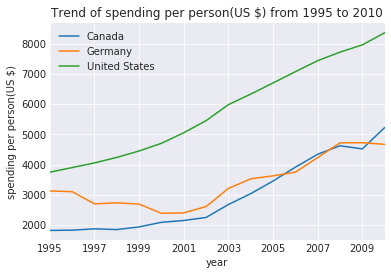

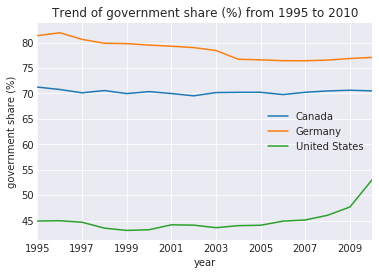

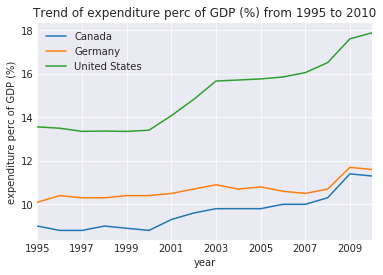

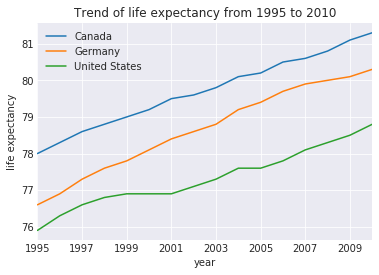

In [8]:
print_all_dfs_as_linechart(dfs)

>One more sanity check to make sure no Null value exists.

In [9]:
for _i in indicators:
    print(dfs[_i].isnull().sum())
    

1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
dtype: int64
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
dtype: int64
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
dtype: int64
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
dtype: int64


<a id='wrangling2'></a>
## Data Wrangling Act 2

The DataFrames so far contains one indicator with index of nation and columns of years. Although this is good to observe trend of individual indicator, such format is not intuitive to compare across different indicators. Here we will try to use both year and nation as multi-index, and use the columns as individual indicators. This way we can combine multiple indicators in single DataFrame and make it more flexible in querying data involving multiple indicators.


In [10]:
# This will be achieved by two levels of nested loop.
# The inner loop will  extract the data per nation, 
# then convert to use both year and nation as index. Then merge these three nations 
# back to a single DataFrame by index for every indicator
#
# The outer loop then merge the DataFrames of indicators by column into a final
# single DataFrame.

# Store the result of inner loop - a single DataFrame for every indicator
_dfs_per_indicator = []

for _i in indicators:
    
    # Store the temp DataFrame of per nation data
    _dfs_per_nation = []
    
    for _n in nations:
        # Extrat the data only for the nation being worked on
        _df = pd.DataFrame(dfs[_i].transpose()[_n])
        
        # Fix the naming after transpose. 
        _df.rename(columns={_n:_i}, inplace=True)
        
        # Generate a Series of 'nation' and set the value to be the current nation being worked on
        # Then add this as a new column 'nation'
        _ps=pd.Series(np.repeat(_n, len(_df.index)), index=_df.index)
        _df['nation']=_ps
        
        # Set the existing index 'year' and the new index 'nation' as multi-index
        _df.set_index([_df.index,'nation'], inplace=True)
    
        # Add the result to the list
        _dfs_per_nation.append(_df)
    
    # Now that all nations are completed, merge them together by index (year, nation), e.g. axis=0 (default)
    _df_per_indicator=pd.concat(_dfs_per_nation)

    # And save them in the list for later
    _dfs_per_indicator.append(_df_per_indicator)

# Now that all indicators are completed, merge them together by column, so that new columns
# will be added as new column.
df_total = pd.concat(_dfs_per_indicator, axis=1)

# Check to see the results is as expected
print(df_total)

                    spending per person(US $)  government share (%)  \
     nation                                                           
1995 Canada                       1820.609018             71.248481   
1996 Canada                       1828.837371             70.775378   
1997 Canada                       1873.002802             70.121715   
1998 Canada                       1848.571848             70.564974   
1999 Canada                       1936.587877             69.966389   
2000 Canada                       2089.213973             70.355744   
2001 Canada                       2148.976137             69.980337   
2002 Canada                       2249.068799             69.525496   
2003 Canada                       2676.794950             70.166612   
2004 Canada                       3036.640797             70.222444   
2005 Canada                       3454.416864             70.222854   
2006 Canada                       3912.321554             69.774922   
2007 C

<a id='eda'></a>
## Exploratory Data Analysis

Given that income for different nations could be on different level, using absolute dollar amount to measure the cost would not represents the true cost. Luckily the data do provide the spending in percentage of GDP, which will be better comparison for different nations. We will examine both.

Also, all our data set are time series, e.g., are provided each year. Obviously we could do comparison at different time, but we would also ignore the time itself and just look at the relationship between indicators, provided they are collected from the same year.

We intend to explore the following two questions:
1. Relationship between spending on healthcare and the life expectancy
2. Relationship between cost (spending on healthcare) and the government share

Beofre we dive deep, let's see a general visualization between indicators and simple regression approximate.


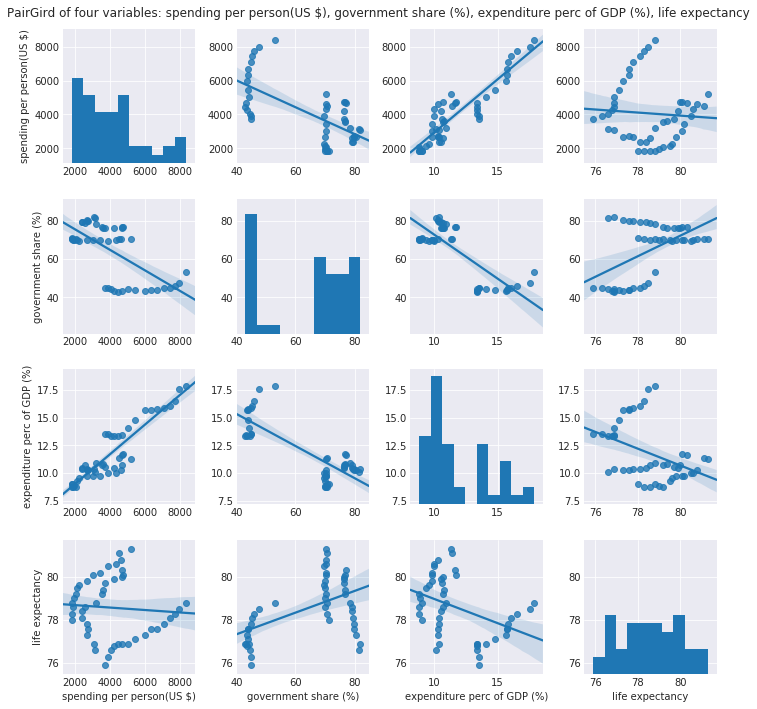

In [11]:
# PairGrid is a great tool to explore relationships of data in different columns.
# Linear Regression is also done easily. Becuase our data have multiple indexes in year and nation, 
# the regression result might not make sense.
sns.pairplot(df_total, kind="reg")
plt.subplots_adjust(top=0.95)
_t = "PairGird of four variables: "
for _i in indicators:
    _t += (str(_i)+", ")
plt.suptitle(_t[:-2])
plt.show()

>For the two questions we want to explore, the whole dataset disregard about year and nation seems to indicate reverse correlations. We will dig further later.

>Before that, let's take a look of the same PairGrid if we use one nation at a time.

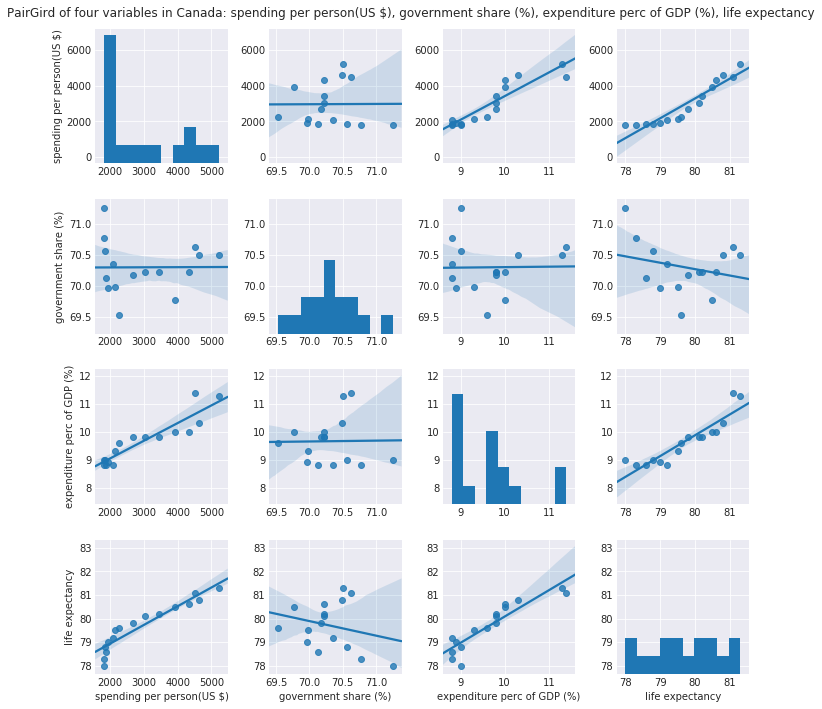

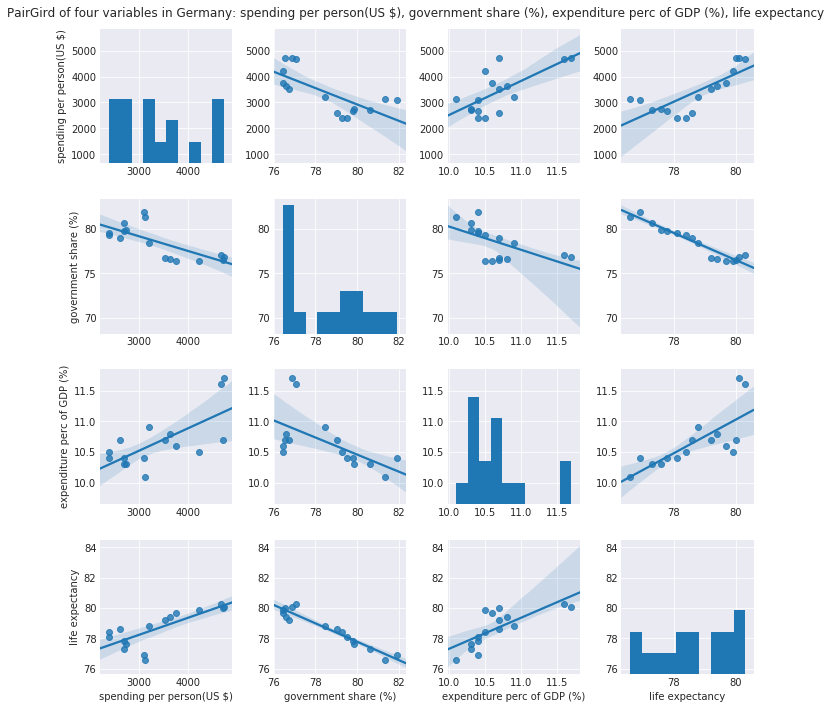

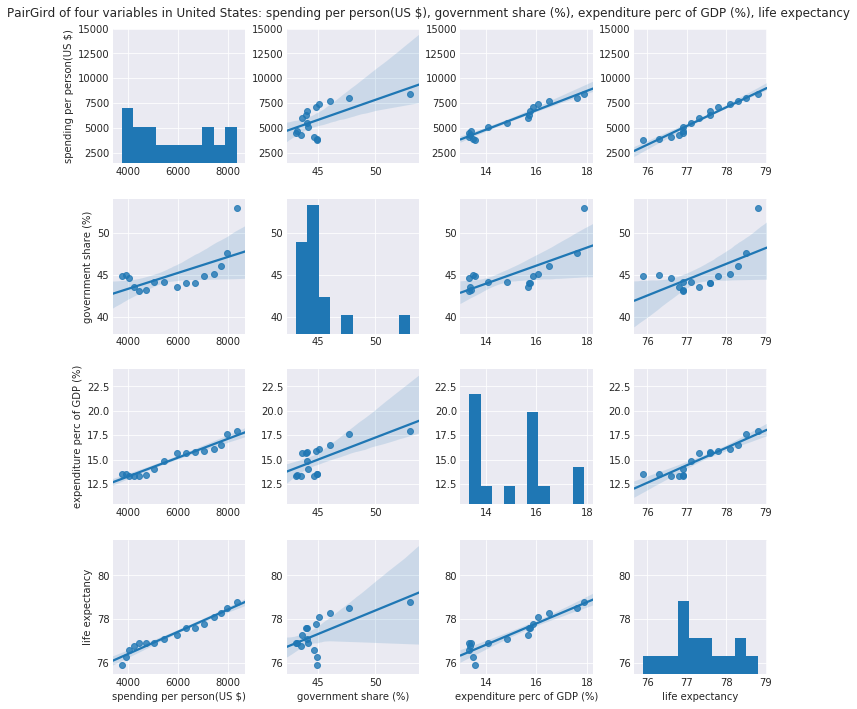

In [12]:
# For plotting separate by nation

#df_total.sortlevel(inplace=True)
df_total.sort_index(level=[0,1],inplace=True)
for _n in nations:
    df_per_nation = df_total.loc[(slice(None),slice(_n, _n)),:]

    sns.pairplot(df_per_nation, kind="reg")

    plt.subplots_adjust(top=0.95)
    _t = "PairGird of four variables in {}: ".format(_n)
    for _i in indicators:
        _t += (str(_i)+", ")
    plt.suptitle(_t[:-2])
    plt.show()


>Using nation as unit, the some relationship changed to positive correlation. This implies we should do the studies for both as a whole and one nation at a time.


### Research Question 1: Relationship between spending on healthcare and the life expectancy

Is spending more get better result? That is, the life expectancy will increase as a result? As previously discussed, we will check healthcare spending of both absolute dollar amount and percentage of GDP, and their relationships to life expectancy. And will do so with three nations as a whole, and one nation at a time.


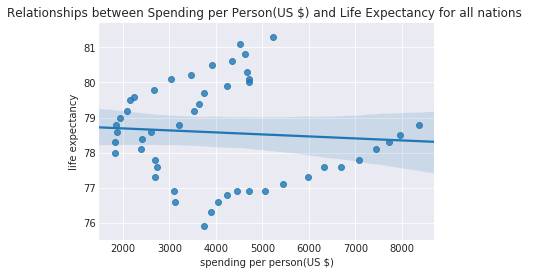

In [13]:
sns.regplot(x='spending per person(US $)', y='life expectancy', data=df_total)
plt.title("Relationships between Spending per Person(US $) and Life Expectancy for all nations ")
plt.show()

For three nations as a whole, there appear to be a slightly negative correlation. The more dollar spend do not lead to longer life. But this appears to be screwed toward one nation. Looking at per nation data below will give better detail.

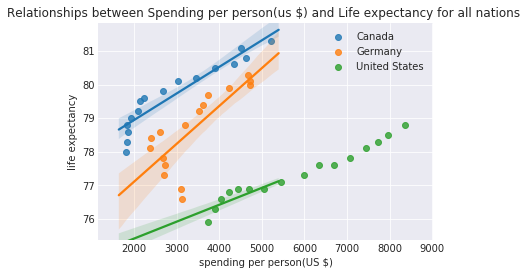

In [14]:
df_total.sort_index(level=[0,1],inplace=True)

def plot_by_nation(X, Y, df_total, nations):
    ''' Plot using seaborn one nation at a time, using X as x-axis and Y as y-axis,
        show nation as legend
    '''
    for _n in nations:
        df_per_nation = df_total.loc[(slice(None),slice(_n, _n)),:]
        sns.regplot(x=X, y=Y, data=df_per_nation, label=_n)
    plt.title("Relationships between {} and {} for all nations ".format(X.capitalize(), Y.capitalize()))
    x_border = (df_total[X].max() - df_total[X].min()) * 0.1
    y_border = (df_total[Y].max() - df_total[Y].min()) * 0.1
    plt.xlim(df_total[X].min() - x_border, df_total[X].max() + x_border)
    plt.ylim(df_total[Y].min() - y_border, df_total[Y].max() + y_border)        
    plt.legend()
    plt.show()

plot_by_nation('spending per person(US $)', 'life expectancy', df_total, nations)


Within each nation, the correlation becomes positive, so more spending are worthy. However, cause and effect relationship is not conclusive as there could be many variable affecting cost, and many other variables affecting life expectancy.

Let's switch to use percentage of GDP, which should somehow rule out the cost of living difference of different nations and give better apple to apple comparison between nations.

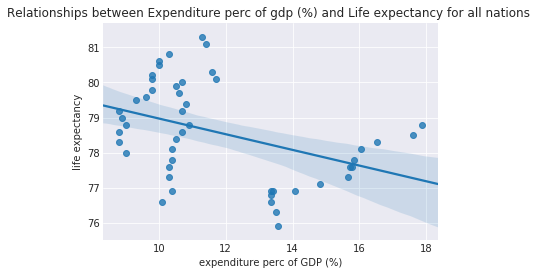

In [15]:
X='expenditure perc of GDP (%)'
Y='life expectancy'
sns.regplot(x=X, y=Y, data=df_total)
plt.title("Relationships between {} and {} for all nations ".format(X.capitalize(), Y.capitalize()))
plt.show()

United States obviously spend more but do not get better health in return. Using absolute dollar amount or percentage of GDP as cost unit do not change the result that United States has shorter life expectancy while has higher spending.

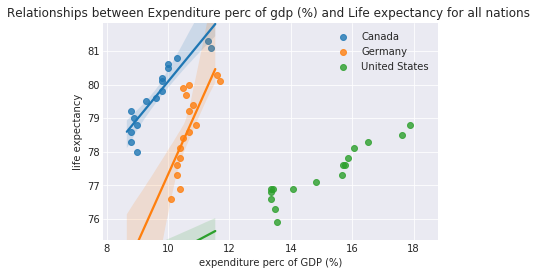

In [16]:
plot_by_nation('expenditure perc of GDP (%)', 'life expectancy', df_total, nations)


Both Canada and Germany still retain good positive correlation. However, the positive correlation in United States are not as 'steep' as Canada and Germany. It seems that for every spending, Americans not get as much health in return than Candians and Germans.

#### Summary of Research Question 1:
United States appears to be an outlier when compared to Canada and Germany in terms of healthcare spending effectiveness. United States spends more but are not healthier. Canadians and Germans spend less on healthcare but are healthier than Americans.


### Research Question 2  Relationship between cost (spending on healthcare) and the government share

Will more government spending on healthcare decrease the efficiency and increase the cost of healthcare, or it help gain bargaining power and be able to keep the cost down?

As previously discussed, we will check healthcare spending of both absolute dollar amount and percentage of GDP, and their relationships to life expectancy. And will do so with three nations as a whole, and one nation at a time.

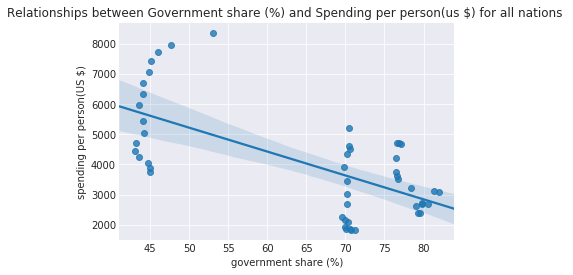

In [17]:
X='government share (%)'
Y='spending per person(US $)'
sns.regplot(x=X, y=Y, data=df_total)
plt.title("Relationships between {} and {} for all nations ".format(X.capitalize(), Y.capitalize()))
plt.show()

For three nations as a whole, there appear to be a negative correlation. The more government share, the lower the cost.


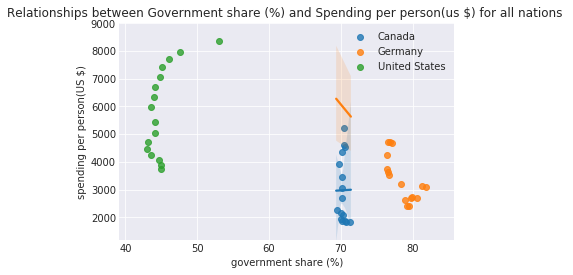

In [18]:
plot_by_nation('government share (%)', 'spending per person(US $)', df_total, nations)



Within each nation, the relationship is not as obvious primarily due to there is little change of government share within each nation. Canada for example, see the healthcare spending increase even when government share is pretty much constant. Germany appears to enjoy some effect of stronger bargaining power of a large single payer system and show a slight negative correlation. United States, again is an outlier, see positive correlation instead. A possiblity could be that the effect of bargaining power requires large enough government share, which is especially obviously for Germany.

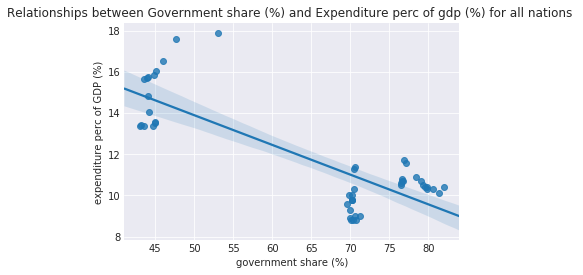

In [19]:
X='government share (%)'
Y='expenditure perc of GDP (%)'
sns.regplot(x=X, y=Y, data=df_total)
plt.title("Relationships between {} and {} for all nations ".format(X.capitalize(), Y.capitalize()))
plt.show()

This confirmed the same negative correlation between government share and the cost of healthcare.

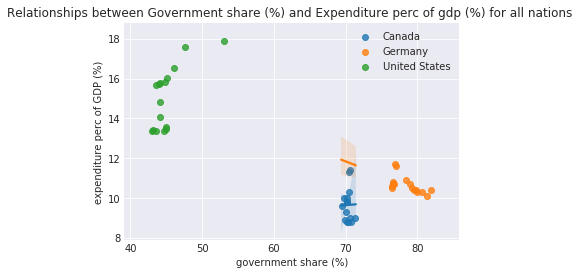

In [20]:
plot_by_nation('government share (%)', 'expenditure perc of GDP (%)', df_total, nations)


Except for the result of smaller value range of spending compared to dollar amount, relationship of percentage of GDP to government share have the same results. Germany has negative correlation, while Canada shows no correlation, and United States show slightly positive correlation.

##Limitation of this study
All the data were obtained from Gapminder. According to Gapminder, the economics related data were obtained from World Health Organization. Economics data could subject to the accuracy concerns depends on how each countries establish their data collection systems. The three countries we study all have long history of practices collecting and reporting these data. The potential of inaccuracy would be of less concern although each country have their own practice and could subject to slight variations.

The life expectancy, for the data between 1995 and 2010 we used, were obtained from Institute for Health Metrics and Evaluation (IHME) from their [tool](http://ghdx.healthdata.org/gbd-results-tool). The life expectancy is expectancy _**at birth**_. Prediction, extrapolation always has potential of not accurate as they are influced by the model they used to predict the data. The data appears to be derived from sampling and according to IHME, ["Uncertainty interval
: A range of values that reflects the certainty of an estimate. In GBD, every estimate is calculated 1,000 times, each time sampling from distributions rather than point estimates for data inputs, data transformations and model choice. The 95th uncertainty interval is determined by the 25th and 975th value of the 1,000 values after ordering them from smallest to largest. Larger uncertainty intervals can result from limited data
availability, small studies, and conflicting data, while smaller uncertainty intervals can result from extensive data  availability, large studies, and data that are consistent across sources.](http://www.healthdata.org/sites/default/files/files/Data_viz/GBD_2016_Tools_Overview.pdf)

<a id='conclusions'></a>
## Conclusions

In this study we use Gapminder data to perform two researches:
1. Relationship of healthcare spending to its effectiveness (life expentancy)
2. Relationship of healthcare spending, to the amount of government control (governemt share of healthcare expenditure)

**On question 1, we found:** Within each nation, all healthcare care show increaed effectiveness with increased spending although at varying degree. Across nations, the story reveres. High spending nation like United States actually has lower effectiveness.


**On question 2, we found:** Within each nation, Germany show negative correlation of governemt share and healthcare spending. United States show positive correlation. Canada shows no correlation. Across nations, negative correlation is observed. Nation with higher government share spend less on healthcare.

*The study performs correlation analysis and did not explore the cause and effects relationships.*

## References
> A simple introduction to multiindex pandas can be found [here](https://www.somebits.com/~nelson/pandas-multiindex-slice-demo.html). Another more in-depth introduction by Hugo Bowne-Anderson is [here](https://www.datacamp.com/community/tutorials/pandas-multi-index)


In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0